# 6.6 Time Series Analysis

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('C:/Users/Kid/Desktop/Achievement 6/Data/Prepared Data/yearly_revenues.csv', index_col=0) # --> The dataset is the result of grouping average revenues by release date

In [3]:
df.head()

revenue_in_mil
release_date                
1980                  179.31
1981                  166.22
1982                  134.94
1983                  155.89
1984                  125.78

>> #### In this time series analysis, we want to analyze whether movies revenue figures varied over time. Additionally, we use the 'release year' as a time-series data instead of the actual release dates to reduce variations and noise.
>> #### The dataset doesn't contain any forecasted data.
>> #### In an effort to reduce outliers from our data, we decided to set a range of dates to include only movies produced between 1980 and 2023.

In [4]:
#formatting index as datetime, year
df.index = pd.to_datetime(df.index, format='%Y')

In [5]:
df.head()

revenue_in_mil
release_date                
1980-01-01            179.31
1981-01-01            166.22
1982-01-01            134.94
1983-01-01            155.89
1984-01-01            125.78

In [6]:
#checking for nulls and duplciates
df.isnull().sum()

revenue_in_mil    0
dtype: int64

In [7]:
df.duplicated().sum()

0

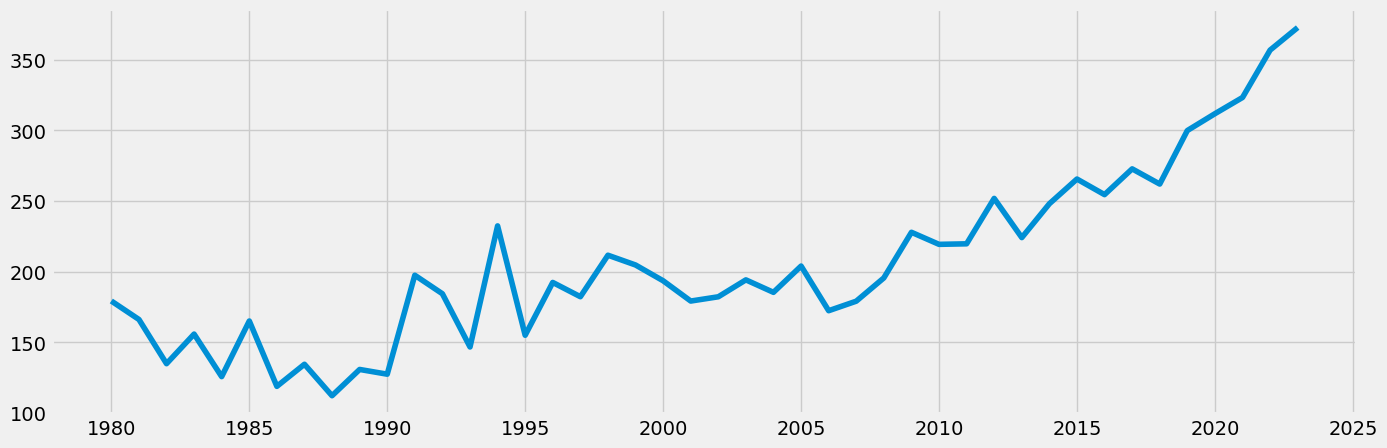

In [8]:
#visualizing time series data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

#### Observation
>> #### The line chart shows that the time series has a dominant uptrend to it, where movies are incrementally generating higher revenues by the years, thus, we can assume it the data is non-stationary.

## Time Series Analysis: Decomposition

>> #### Since the data behave in a non-linear fashion, we'll be using the multiplicative decomposition model.

In [9]:
decomposition = sm.tsa.seasonal_decompose(df, model='mutliplicative')

In [10]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

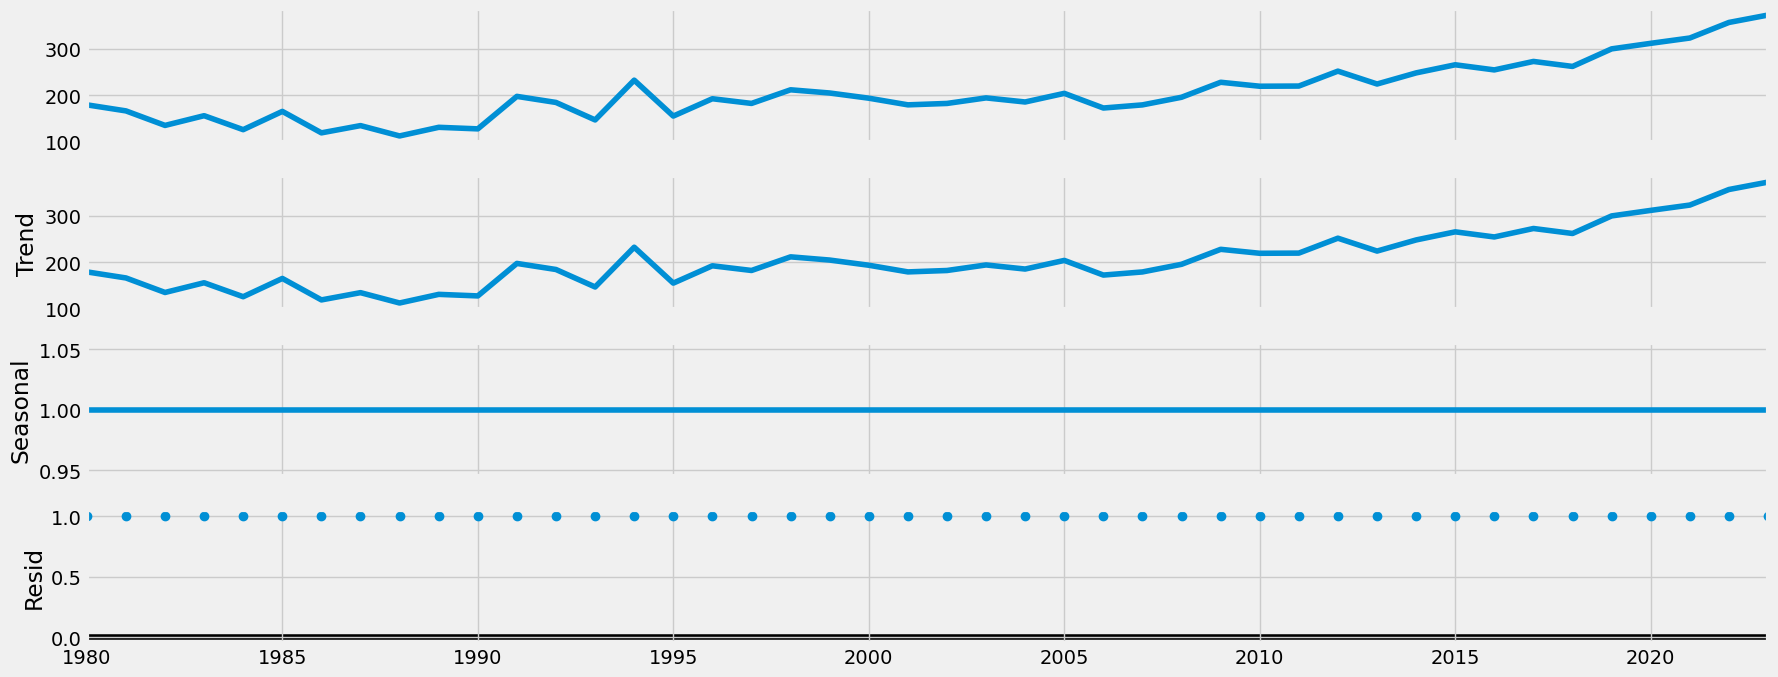

In [11]:
#visualizing the decomposed time series components
decomposition.plot()
plt.show()

>> #### The times series Level and Trend components looks identical as the data uses a yearly interval, which greatly reduces variations and noise.
>> #### We notice that the time series has no seasonality component.

## Time Series Analysis: Testing for Stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(df['revenue_in_mil'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.717991
p-value                         0.998172
Number of Lags Used             2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


>> #### The Test Statistics is larger than the critical values, this means we can't disprove the presence of a unit root, which further indicates the data is non-stationary.
>> #### Proceeding to Autocorrelation testing.

## Time Series Analysis: Testing for Autocorrelation

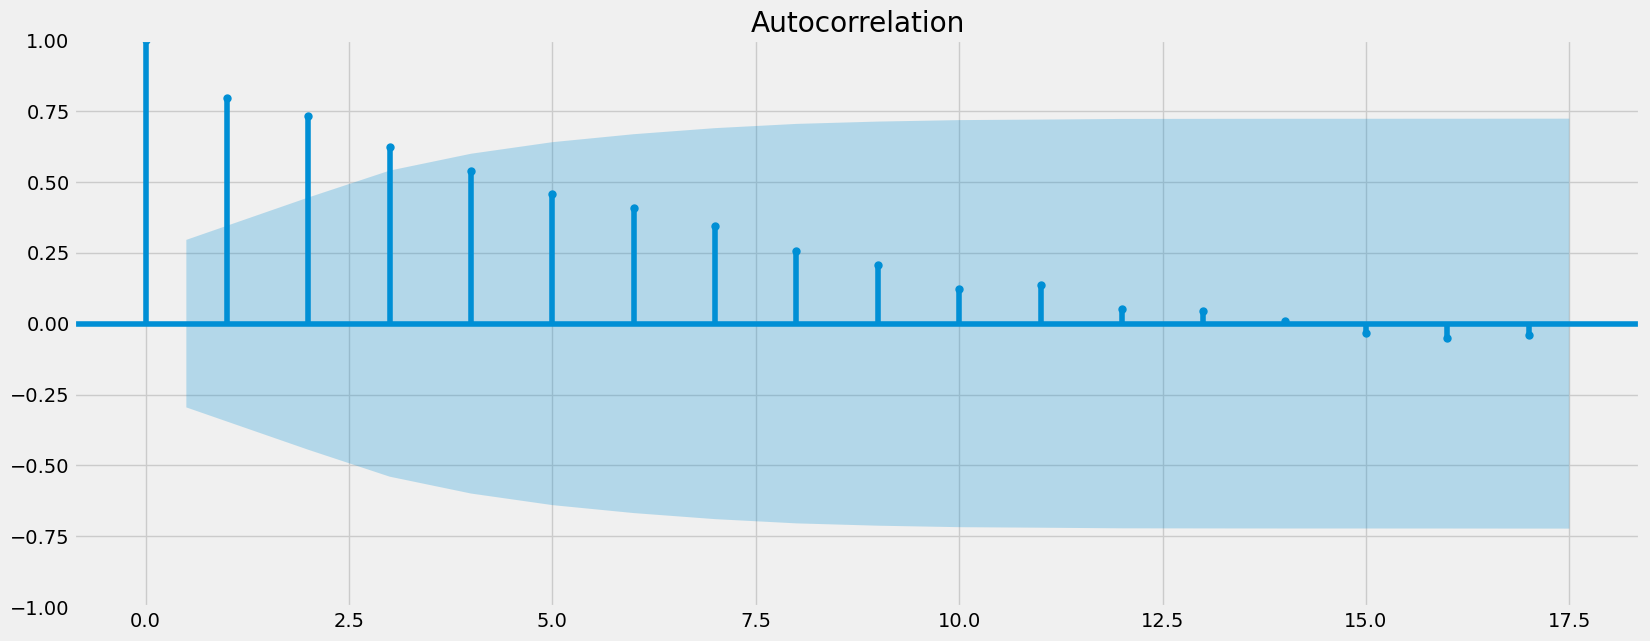

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plt.show()

>> #### The autocorrelation plot shows that some of the lags fall beyond the confidence interval, which indicates that not a lot of data are autocorrelated.

## Time Series Analysis: Differencing

In [14]:
df_diff = df - df.shift(1)

In [15]:
df_diff.head()

revenue_in_mil
release_date                
1980-01-01               NaN
1981-01-01            -13.09
1982-01-01            -31.28
1983-01-01             20.95
1984-01-01            -30.11

In [16]:
#handling null values
df_diff.dropna(inplace=True)

In [17]:
#checking for nulls
df_diff.isnull().sum()

revenue_in_mil    0
dtype: int64

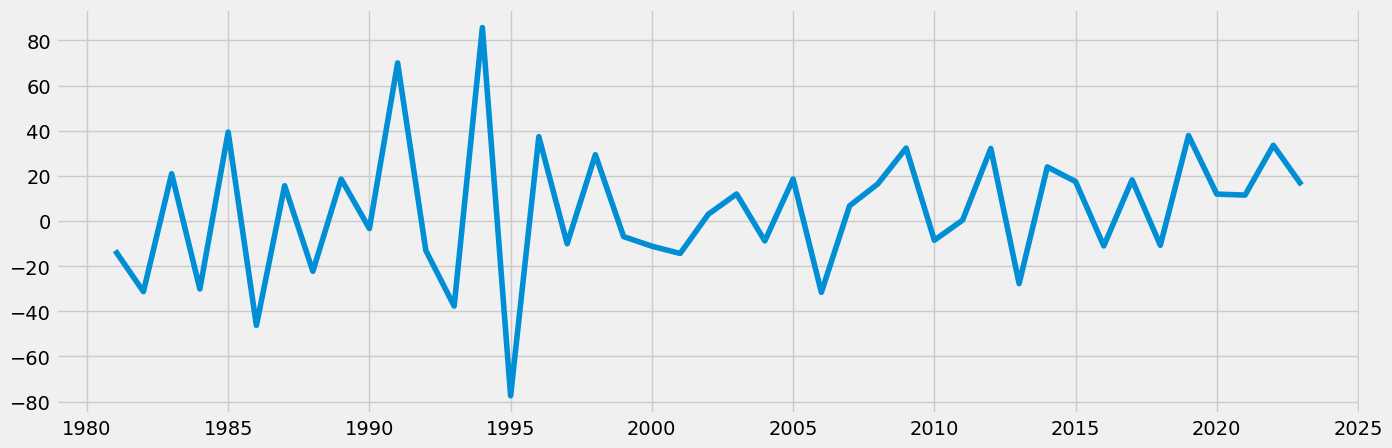

In [18]:
#visualizing differenced result
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [19]:
#conducting statistical test after differencing
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(df_diff['revenue_in_mil'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.061406e+00
p-value                        1.210119e-07
Number of Lags Used            1.000000e+00
Number of Observations Used    4.100000e+01
Critical Value (1%)           -3.600983e+00
Critical Value (5%)           -2.935135e+00
Critical Value (10%)          -2.605963e+00
dtype: float64


>> #### The Statistical Test after differencing is now less than the critical values. This means we now have a stationary time series.

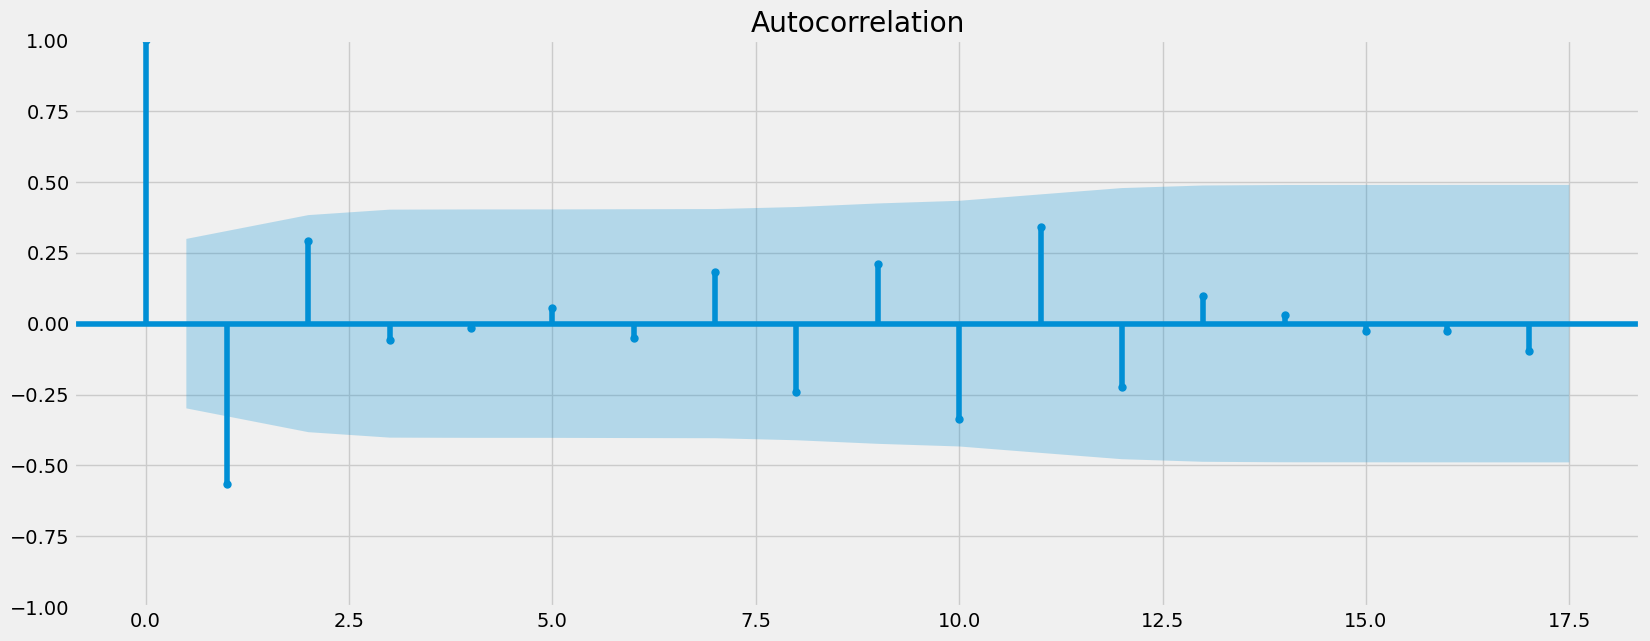

In [20]:
#visualizing autocorrelation after differencing
plot_acf(df_diff)
plt.show()

>> #### We can see that after differencing, the autocorrelation plot has now improved, although not perfect, since we still have few lags sitting outside the confidence interval. 
>> #### This degree of stationarity enables us to forecast the time series and predict future movie revenues.